# Alarm data - Statistics 1
Count the number of occurences of alarms for each date, message, ID, ...

## Input

#### Imports

In [1]:
import pandas as pd
import collections
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use = 'default' 
import datetime
from dateutil.relativedelta import relativedelta
from calendar import monthrange

#### Data

In [2]:
file = "../Data/alarms.csv"
df = pd.read_csv(file)

df = df[df['State']==1]                                         # Only keep upcoming alarms
df.drop('State', axis=1, inplace=True)

df['Date'] = df['Timestamp'].map(lambda x: x.split(' ')[0])     # Split timestamp in date and time
df['Time'] = df['Timestamp'].map(lambda x: x.split(' ')[1])
df.drop('Timestamp', axis=1, inplace=True)

df[:5]

Message                 Id  \
0  EXP-COLL-A-FAALT: TIJDSBEWAKING EXPANSIE COLLE...   EXP-COLL-A-FAALT   
2  S350-02-EL1: LEVEL 1 ENTIS BULLET 350-02 LAAG ...        S350-02-EL1   
3  EXP-COLL-A-FAALT: TIJDSBEWAKING EXPANSIE COLLE...   EXP-COLL-A-FAALT   
5        ZELFTEST-ST629A  : ST629A ZELFTEST IN ALARM  ZELFTEST-ST629A     
8  HV-LA28-006: HANDAFSLUITER 1-BUTENE VAN/NAAR L...        HV-LA28-006   

   Class   Type        Date      Time  
0  Error  Alarm  2016-03-20  00:07:13  
2  Error  Alarm  2016-03-20  01:07:14  
3  Error  Alarm  2016-03-20  01:12:14  
5  Error  Alarm  2016-03-20  01:13:08  
8  Error  Alarm  2016-03-20  02:32:39

In [3]:
len(df)

52718

## Occurences

In [4]:
def PlotPerMonth(data):
    x = min(data['Date']).split('-')
    firstDate = datetime.date(int(x[0]), int(x[1]), int(x[2]))  # First date
    date = firstDate
    x = max(data['Date']).split('-')
    lastDate = datetime.date(int(x[0]), int(x[1]), int(x[2]))   # Last date
    dates = list()
    while date <= lastDate:
        dates.append(str(date.year) + '-' + str(date.month).zfill(2))
        date += relativedelta(months=1)
    for i,n in enumerate(dates):
        df_d = data[data['Date'].map(lambda x: n in x)]
        dfc = df_d.groupby('Date').size()

        _,r = monthrange(int(n.split('-')[0]),int(n.split('-')[1]))
        lr = [n+'-'+str(x).zfill(2) for x in range(1,r+1)]
        for x in lr:
            if x not in dfc: dfc[x] = 0
        dfc.sort_index(inplace=True)
    
        plt.figure(i,figsize=(10,5))
        ax = plt.subplot(1,1,1)
        dfc.plot.bar(ax=ax,title='Alarms per day ({})'.format(n))
        ax.axhline(dfc.mean(), color='r',linewidth=2)   
        plt.yticks(range(0,100,10))
        plt.xticks(range(0,r),rotation='vertical')
        plt.ylabel('# Alarms')
    return 

#### Class & type

In [5]:
# Class count
dfc_c = df.groupby('Class').size() 
dfc_c.sort_values(inplace=True,ascending=False)
dfc_c

Class
Error        32605
Tolerance    20113
dtype: int64

In [6]:
# Type count
dfc_t = df.groupby('Type').size() 
dfc_t.sort_values(inplace=True,ascending=False)
dfc_t

Type
Alarm                 28350
Truckloading          12818
Simulation             3360
Manual                 2701
ESD_Alarm              2614
Warning                1540
Bypass_ESD              707
Buiten_dienst           524
Alarm_Truckloading      101
Maintenance               3
dtype: int64

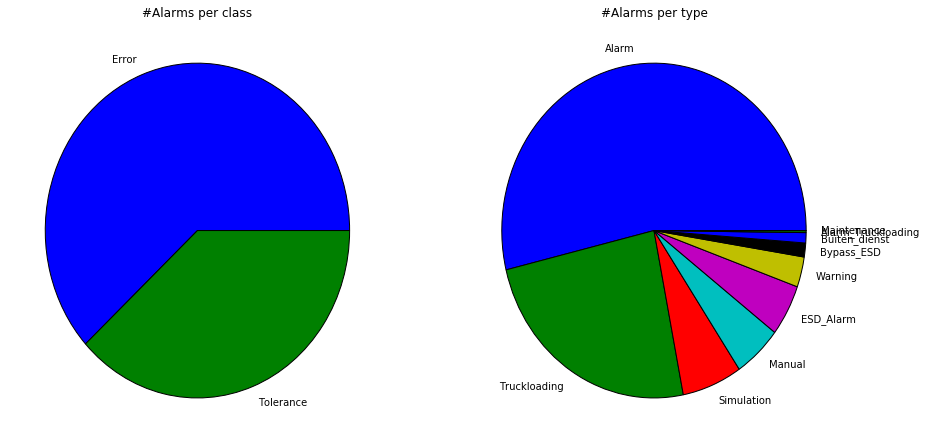

In [7]:
# Class & type plot
plt.figure(1,figsize=(15,7.5))
ax1 = plt.subplot(1,2,1)
dfc_c.plot.pie(ax=ax1, title="#Alarms per class")
plt.ylabel('')

ax2 = plt.subplot(1,2,2)
dfc_t.plot.pie(ax=ax2, title="#Alarms per type")
plt.ylabel('')

plt.show()

#### TAKE SUBSET OF DATA

In [8]:
# From here on, only take the 'error'class alarms into account
dff = df[df['Class'] == 'Error']
len(dff)

32605

#### Timestamp

In [9]:
# Timestamp count
dfc = dff.groupby('Date').size()
dfc.count()

150

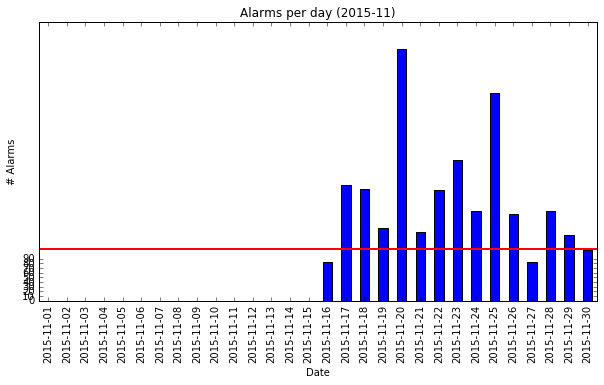

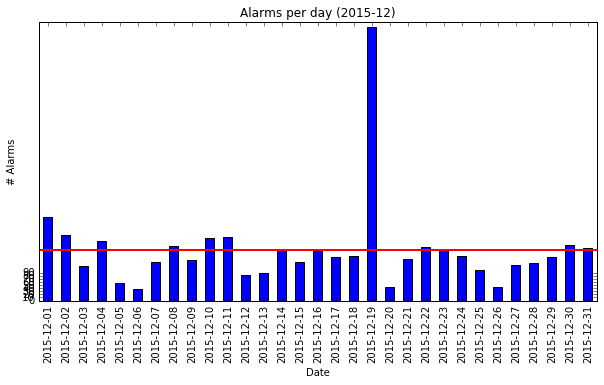

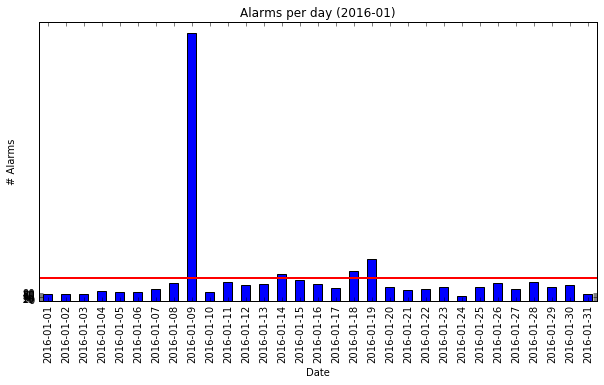

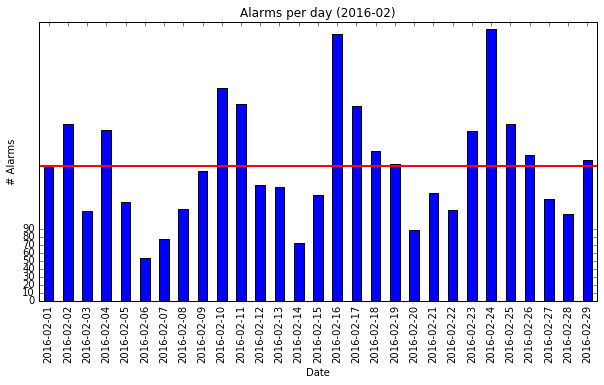

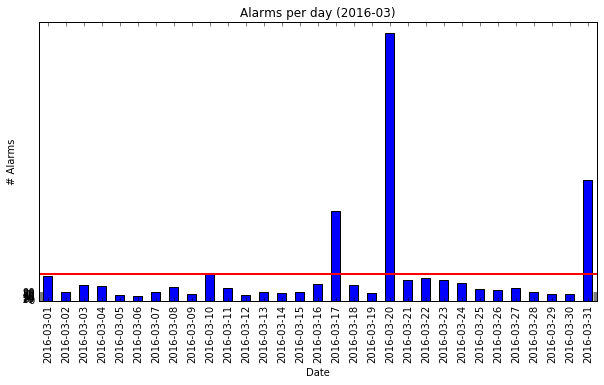

In [10]:
# Timestamp plot
PlotPerMonth(dff)

#### Message

In [11]:
# Message count 
dfc_m = dff.groupby('Message').size() 
dfc_m.sort_values(inplace=True,ascending=False)
dfc_m[:10]

Message
EXP-COLL-A-FAALT: TIJDSBEWAKING EXPANSIE COLLECTOR A IN ALARM                   360
LSH-OWS06-001: HOOG NIVEAU WATER OLIE/WATER AFSCHEIDER 6 IN ALARM               248
TTWW-420-03-003: TEMPERATUURMETING WARMWATER UNIT WW-T420-03 HOOG ALARM         223
T1200-4-ET2: TEMPERATUUR GASFASE ENTIS TANK 1200-4 MEETFOUT                     206
HERHALINGSALARM : ADN ST625A OVERVULBEVEILIGING SCHIP                           189
LSH-ADN-ST621B-001 : ADN ST621B OVERVULBEVEILIGING SCHIP                        175
LSH-ADN-ST625A-001 : ADN ST625A OVERVULBEVEILIGING SCHIP                        155
LSH-L115-001: OVERVULBEVEILIGING VRACHTWAGENBELADING L115                       133
TTWW-420-02-003: TEMPERATUURMETING WARMWATER UNIT WW-T420-02 HOOG ALARM         132
TTWW-420-03-003: TEMPERATUURMETING WARMWATER UNIT WW-T420-03 HOOG HOOG ALARM    131
dtype: int64

In [12]:
# Message stats
dfc_m.describe()

count    5270.000000
mean        6.186907
std        13.413613
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       360.000000
dtype: float64

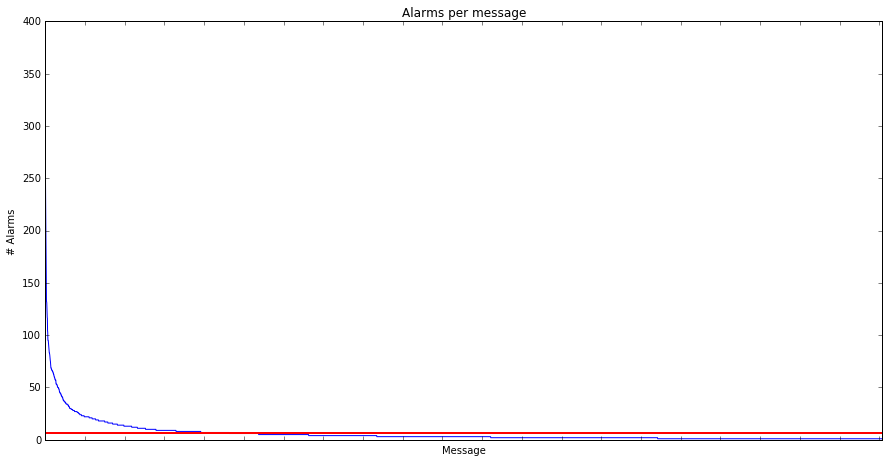

In [13]:
# Message plot
plt.figure(figsize=(15,7.5))
ax = plt.subplot(1,1,1)

dfc_m.plot(ax=ax,title='Alarms per message')
ax.axhline(dfc_m.mean(), color='r',linewidth=2)   

plt.xticks(range(0,len(dfc_m),250))
plt.setp(ax.get_xticklabels(),visible=False)
plt.ylabel('# Alarms')
plt.show()

#### Id

In [14]:
# ID count
dfc_i = dff.groupby('Id').size() 
dfc_i.sort_values(inplace=True,ascending=False)
dfc_i[:10]

Id
HERHALINGSALARM     457
EXP-COLL-A-FAALT    360
TTWW-420-03-003     354
PT-BW-T1-001        307
VPU003              303
T1200-4             290
LSH-OWS06-001       248
unknown             227
T1200-4-ET2         206
TTWW-420-02-003     200
dtype: int64

In [15]:
# ID stats
dfc_i.describe()

count    4297.000000
mean        7.587852
std        19.501379
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max       457.000000
dtype: float64

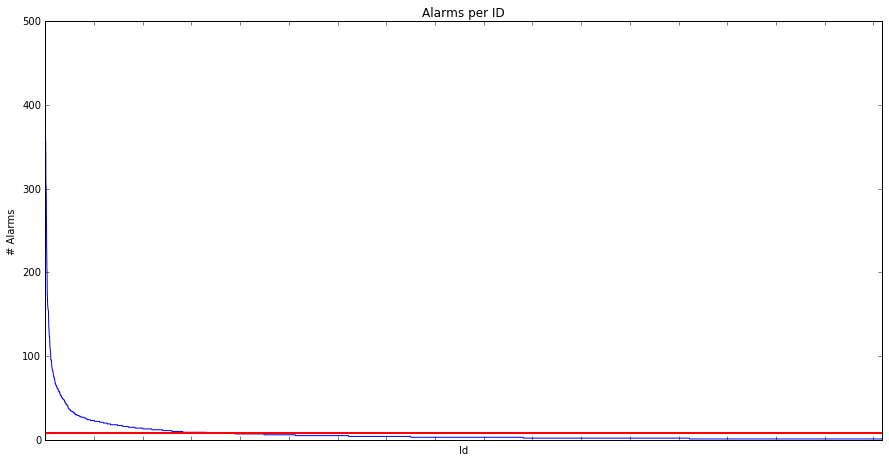

In [16]:
# ID plot
plt.figure(figsize=(15,7.5))
ax = plt.subplot(1,1,1)

dfc_i.plot(ax=ax,title='Alarms per ID')
ax.axhline(dfc_i.mean(), color='r',linewidth=2)   

plt.xticks(range(0,len(dfc_i),250))
plt.setp(ax.get_xticklabels(),visible=False)
plt.ylabel('# Alarms')
plt.show()